<a href="https://colab.research.google.com/github/rita-milani/BSB/blob/main/Industrial_Production_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**China Industrial Production using PyCaret - Univariate Model**

In [ ]:
# install pycaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.5 MB/s eta 0:00:00
   

In [ ]:
# import libraries
from pycaret.regression import *
from pycaret.time_series import TSForecastingExperiment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# set charts style
sns.set_style('darkgrid')

In [ ]:
# load the file
df = pd.read_excel('ind_prod.xlsx', sheet_name='dados', index_col=0)
df = df.drop('ret_sale', axis=1)
df.tail()

,ind_prod
2024-05-01,3377.893200
2024-06-01,3855.071984
2024-07-01,3184.062357
2024-08-01,3410.846905
2024-09-01,3493.014757


In [ ]:
# check variable type
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 297 entries, 2000-01-01 to 2024-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ind_prod  297 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


In [ ]:
# check for null values
df.isnull().sum()

,0
ind_prod,0


In [ ]:
# descriptive statistics
df.describe()

,ind_prod
count,297.000000
mean,1728.327770
std,1015.164914
min,323.424908
25%,753.899877
50%,1693.167171
75%,2574.930403
max,4108.912503


<Axes: xlabel='None', ylabel='ind_prod'>

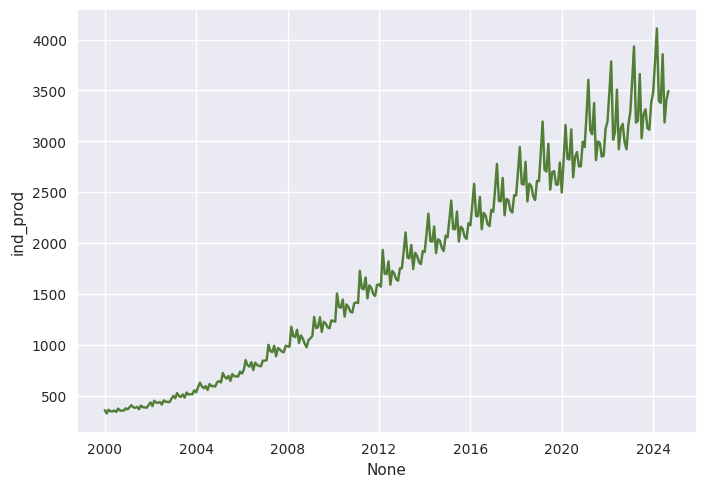

In [108]:
# plot the original chart
sns.lineplot(df, x=df.index, y='ind_prod', color='#537e37')

<Axes: ylabel='ind_prod'>

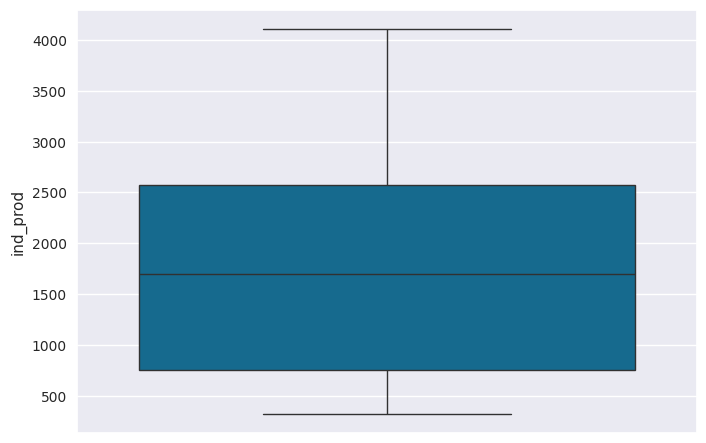

In [ ]:
# create a boxplot
sns.boxplot(df.ind_prod)

<Axes: xlabel='ind_prod', ylabel='Count'>

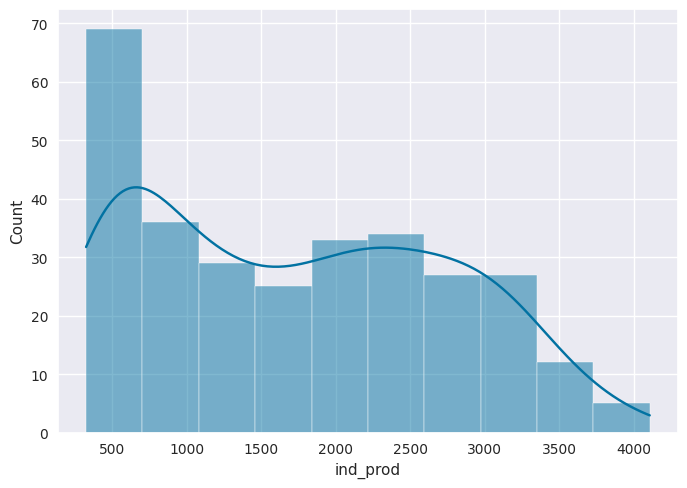

In [ ]:
# plot the original dataset distribution
sns.histplot(df.ind_prod, kde=True)

In [71]:
# 1st difference for stationariety
df['ind_prod_d'] = df['ind_prod'] - df['ind_prod'].shift(1)
df.head()

,ind_prod,ind_prod_d
2000-01-01,355.945380,NaN
2000-02-01,323.424908,-32.520472
2000-03-01,360.665372,37.240465
2000-04-01,345.093016,-15.572357
2000-05-01,343.329768,-1.763248


In [72]:
# create a new df only with diff series to work with pycaret
df1 = df.drop('ind_prod', axis=1)
df1.head()

,ind_prod_d
2000-01-01,NaN
2000-02-01,-32.520472
2000-03-01,37.240465
2000-04-01,-15.572357
2000-05-01,-1.763248


In [73]:
# create the experiment and initialize the setup
exp = TSForecastingExperiment()
exp.setup(data=df1,
          target='ind_prod_d',
          numeric_imputation_target='mean',
          fh=15,
          fold=3,
          enforce_exogenous=False,
          session_id = 123)

,Description,Value
0,session_id,123
1,Target,ind_prod_d
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(297, 1)"
5,Transformed data shape,"(297, 1)"
6,Transformed train set shape,"(282, 1)"
7,Transformed test set shape,"(15, 1)"
8,Rows with missing values,0.3%
9,Fold Generator,ExpandingWindowSplitter


Mean of transformed data: 10.598207355960447
Standard deviation of transformed data: 185.78070724861325


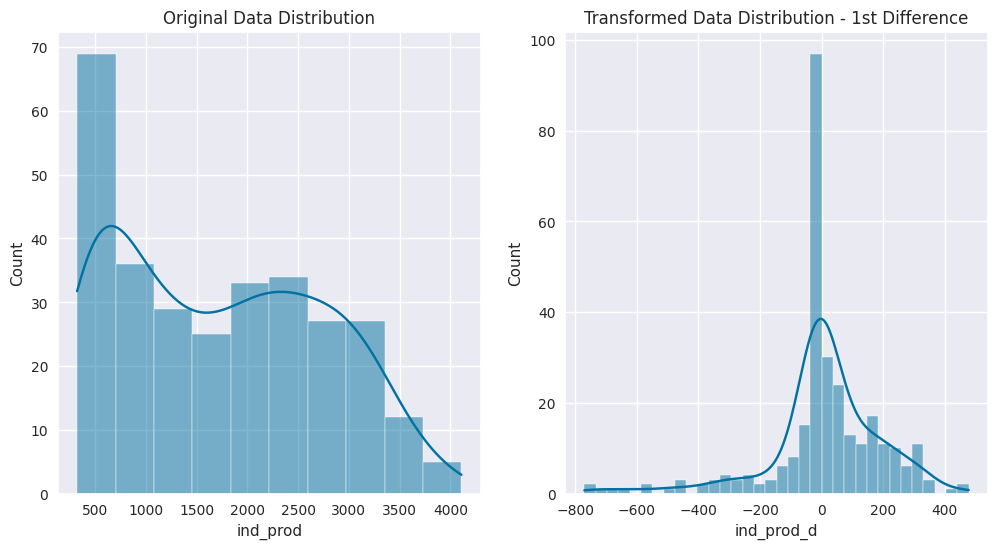

In [ ]:
# 1. Access transformed data and calculate mean and std:
transformed_data = exp.get_config('y_transformed')
mean = np.mean(transformed_data)
std = np.std(transformed_data)

print(f"Mean of transformed data: {mean}")
print(f"Standard deviation of transformed data: {std}")

# 2. Visualize the data:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Original data
sns.histplot(df.ind_prod, ax=ax1, kde=True)
ax1.set_title('Original Data Distribution')

# Transformed data - 1st difference
sns.histplot(transformed_data, ax=ax2, kde=True)
ax2.set_title('Transformed Data Distribution - 1st Difference')

plt.show()

In [ ]:
# check for stationarity
exp.check_stats(test="all")

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,297.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,10.598207
3,Summary,Statistics,Transformed,Median,,-2.319332
4,Summary,Statistics,Transformed,Standard Deviation,,186.094261
5,Summary,Statistics,Transformed,Variance,,34631.074129
6,Summary,Statistics,Transformed,Kurtosis,,3.655938
7,Summary,Statistics,Transformed,Skewness,,-1.182573
8,Summary,Statistics,Transformed,# Distinct Values,,289.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1190.999624


In [62]:
# analyse models
best = exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
stlf,STLF,3.4831,2.8485,68.5759,101.3578,8.0364,0.6608,0.8878,0.1700
auto_arima,Auto ARIMA,3.6959,3.2552,72.9502,115.5820,9.9879,0.6715,0.8438,63.0300
snaive,Seasonal Naive Forecaster,3.6969,3.1294,72.5998,110.6371,9.7222,0.6762,0.8563,0.1267
ets,ETS,3.7193,3.1593,73.1802,112.0929,9.3730,0.6804,0.8564,0.1933
arima,ARIMA,3.7580,2.9448,73.8060,104.0284,6.9095,0.6850,0.8730,0.3667
exp_smooth,Exponential Smoothing,3.7622,3.1530,73.8923,111.7639,9.2461,0.6981,0.8574,1.0200
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,3.7654,3.1856,74.1456,113.1283,10.5895,0.6739,0.8524,0.9700
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,3.7850,3.1853,74.5963,113.1170,9.4580,0.6797,0.8543,0.7700
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,3.7993,3.3034,75.4139,117.8997,2.0956,0.6736,0.8416,0.6167
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,3.8023,3.3139,75.4419,118.1817,2.2613,0.6747,0.8402,0.6067


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [74]:
# create the selected model
autoar = exp.create_model('auto_arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-09,3.2351,3.0236,56.1896,89.0013,27.3738,0.6434,0.8689
1,2020-12,3.9402,3.7667,76.7078,135.2987,1.2100,0.6474,0.7591
2,2022-03,4.2074,3.0348,91.1377,124.3371,0.6439,0.7475,0.8969
Mean,NaT,3.7942,3.2750,74.6783,116.2124,9.7426,0.6794,0.8416
SD,NaT,0.4101,0.3477,14.3395,19.7547,12.4693,0.0482,0.0595


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [109]:
# plot diagnostic charts
print(exp.plot_model(autoar, plot='diagnostics'))

None


In [75]:
# finalizing the model (over train and test sets)
final_model = exp.finalize_model(autoar)

In [110]:
# plot insample chart (actual vs predicted)
print(exp.plot_model(final_model, plot = 'insample'))

None


In [80]:
# predictions
y_pred = exp.predict_model(final_model)
print(y_pred)

           y_pred
2024-10 -187.7559
2024-11  -23.6449
2024-12  262.8270
2025-01  103.4348
2025-02  314.7101
2025-03  314.9360
2025-04 -715.5876
2025-05  -15.1740
2025-06  476.0052
2025-07 -666.5852
2025-08  227.9766
2025-09   79.3209
2025-10 -187.0411
2025-11  -22.4282
2025-12  263.6211


In [111]:
# plot forecast
print(exp.plot_model(final_model, plot='forecast'))

None
